# Solutions to the Prompts in the ODE Analysis Notebook
Note: these are potential solutions, and are not unique.  If you coded a different way, no problem!
There are also some extension problems listed at the bottom if you want to try them.

In [1]:
import numpy as np # Numerical computing library
import matplotlib.pyplot as plt # Plotting library
import scipy.integrate # Integration library
from scipy.integrate import odeint # function to solve ODEs numerically
import matplotlib.patches as mpatches # used to write custom legends
# embedds plots in notebook
%matplotlib inline 

### SIR Model
$$\frac{dS}{dt} = - \alpha S I$$

$$\frac{dI}{dt} = \alpha S I -\beta I$$

$$\frac{dR}{dt} = \beta I$$

If we assume the total population is constant $N$, then $S+I+R=N$ and we can eliminate the last equation in the model (if we can solve for $S$ and $I$, then we know what $R$ is).  You can read more about this model in our Math 313 textbook (Section 2.7).

1. Plot solutions ($S(t)$ and $I(t)$) for a variety of initial conditions with parameters $\alpha$=.2 and $\beta$=.1.
2. Plot a phase portrait and include nullclines.
3. Repeat, but for parameters $\alpha$=.2 and $\beta$=1. ($\beta$ increased by an order of magnitude).
4. Solve for the Jacobian symbolically.
5. Calculate the eigenvalues for each case and classify the equilibria.
6. Draw a bifurcation diagram with $\beta$ as the parameter and $I$ as the variable.

### Task 1: Plot $S$ and $I$ for different initial conditions.
First let's solve and plot for one initial condtion to make sure things are good to go.  After this we can loop through a set of initial condition.

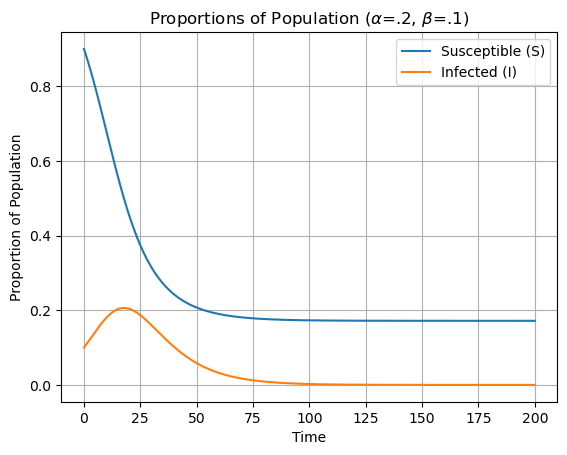

In [4]:
# do not need to track R since S + I + R = 1
def SIR(y,t):
    """ODE system modeling SIR model
    y (array): (S, proportion of population susceptible and I, proportion of population infected)
    t (float): time
    Return: dy/dt"""
    alpha = .2 # given transmission rate
    beta = .1 # given recovery rate
    S, I = y 
    return np.array([- alpha * S * I ,
                     alpha * S * I - beta * I])

# Initial condition and time span
initial_condition = (0.9, .1)
time = np.linspace(0, 200, 1000)

# Solve the ODE
# form is scipy.integrate.odeint(func, y0, t, args=(), ...) 
# where func defines the RHS of the system of ODEs, y0 is initial condition
# t is array of time points where solution is computed
# args optional tuple
solution = scipy.integrate.odeint(SIR, y0=initial_condition, t=time)

# Plot the results
plt.plot(time, solution[:, 0], label='Susceptible (S)')
plt.plot(time, solution[:, 1], label='Infected (I)')
plt.xlabel('Time')
plt.ylabel('Proportion of Population')
# the r makes strings raw so I can use LaTex math mode to write alpha, beta in greek
plt.title(r'Proportions of Population ($\alpha$=.2, $\beta$=.1)')
plt.legend(loc = 'best') # this optional argument puts the legend in the best place
plt.grid(True)
# save as a pdf if you need the image file for Overleaf, etc.
plt.savefig("SIR.pdf")
# see plot in notebook
plt.show()

### Task 1 Continued: Plot solutions for a variety of initial conditions

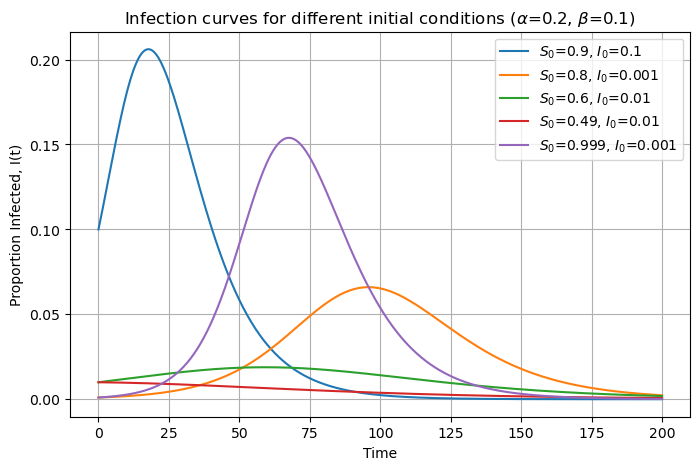

In [9]:
# Keep your imports, SIR(), alpha, beta definitions as before

# Time span
time = np.linspace(0, 200, 1000)

# --- Suggested initial conditions ---
initial_conditions = [
    (0.9, 0.1),    # classic outbreak
    (0.8, 0.001),  # tiny seed, grows slowly
    (0.6, 0.01),   # just above threshold
    (0.49, 0.01),  # below threshold (dies out)
    (0.999, 0.001) # nearly all susceptible
]

# Plot I(t) for each initial condition
plt.figure(figsize=(8, 5))
for S0, I0 in initial_conditions:
    sol = scipy.integrate.odeint(SIR, y0=(S0, I0), t=time)
    I = sol[:, 1]
    plt.plot(time, I, label=f"$S_0$={S0}, $I_0$={I0}") # label argument appears in legend
    # the string prefix f lets us insert variables directly inside {}
    

plt.xlabel("Time")
plt.ylabel("Proportion Infected, I(t)")
plt.title(r'Infection curves for different initial conditions ($\alpha$=0.2, $\beta$=0.1)')
plt.legend(loc="best")
plt.grid(True)
plt.savefig("I_SIR_multi_ICs.pdf")
plt.show()


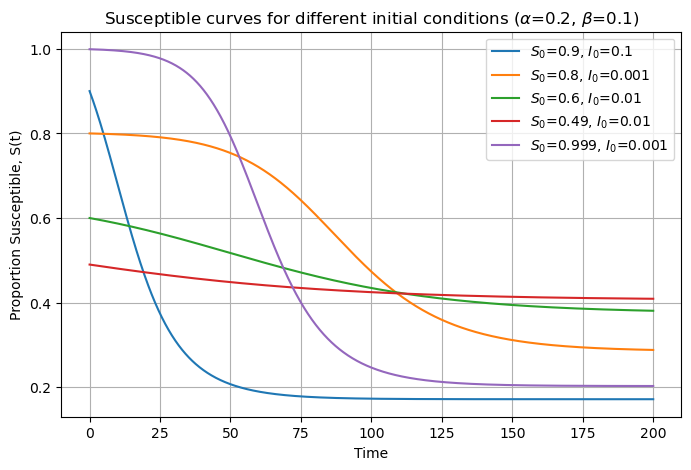

In [14]:
# Plot S(t) for each initial 
plt.figure(figsize=(8, 5))
for S0, I0 in initial_conditions:
    sol = scipy.integrate.odeint(SIR, y0=(S0, I0), t=time)
    S = sol[:, 0] # just modify index
    plt.plot(time, S, label=f"$S_0$={S0}, $I_0$={I0}") # label argument appears in legend
    # the string prefix f lets us insert variables directly inside {}
    

plt.xlabel("Time")
plt.ylabel("Proportion Susceptible, S(t)")
plt.title(r'Susceptible curves for different initial conditions ($\alpha$=0.2, $\beta$=0.1)')
plt.legend(loc="best")
plt.grid(True)
plt.savefig("S_SIR_multi_ICs.pdf")
plt.show()

### Alternatively, can put the plots side by side using subplots

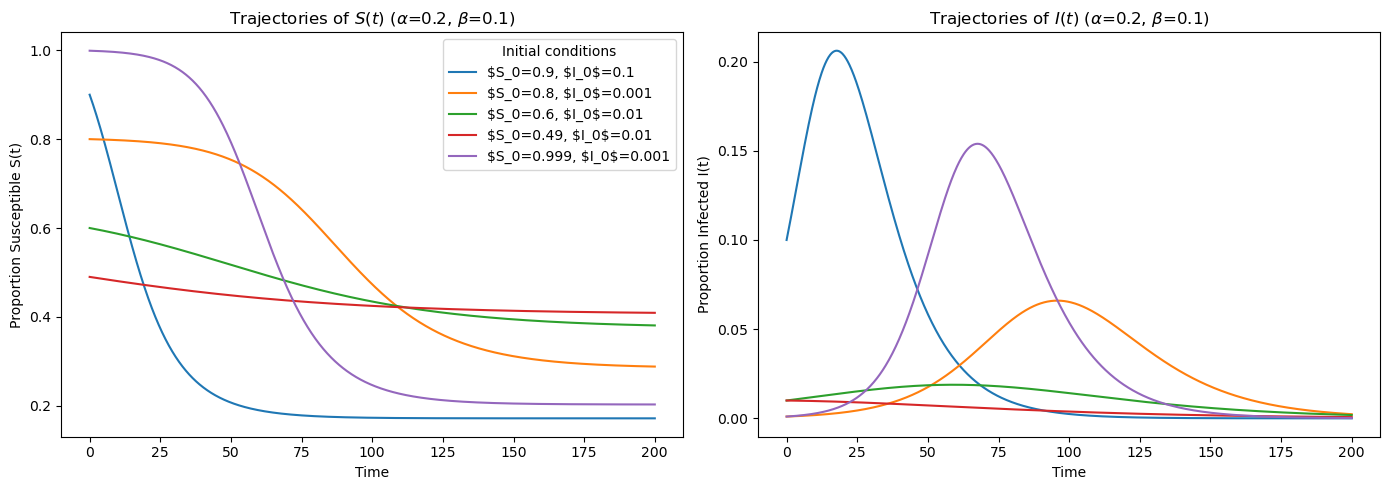

In [15]:
# Two side-by-side subplots: one for S(t), one for I(t)
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

for j, (S0, I0) in enumerate(initial_conditions):
    # Solve system for this IC
    sol = scipy.integrate.odeint(SIR, y0=(S0, I0), t=time)
    S, I = sol[:, 0], sol[:, 1]

    # Plot S(t) on left axis
    line = ax[0].plot(time, S, label= f"$S_0={S0}, $I_0$={I0:}")

    # Plot I(t) on right axis, same color as S(t)
    ax[1].plot(time, I, color=line[0].get_color())

# Set axis labels and titles
ax[0].set(xlabel='Time', ylabel='Proportion Susceptible S(t)',
          title=r'Trajectories of $S(t)$ ($\alpha$=0.2, $\beta$=0.1)')
ax[1].set(xlabel='Time', ylabel='Proportion Infected I(t)',
          title=r'Trajectories of $I(t)$ ($\alpha$=0.2, $\beta$=0.1)')

# Add legend only once (left plot)
ax[0].legend(title='Initial conditions', loc='best')

plt.tight_layout()
plt.show()


### Task 2: Plot a phase portrait and include nullclines.

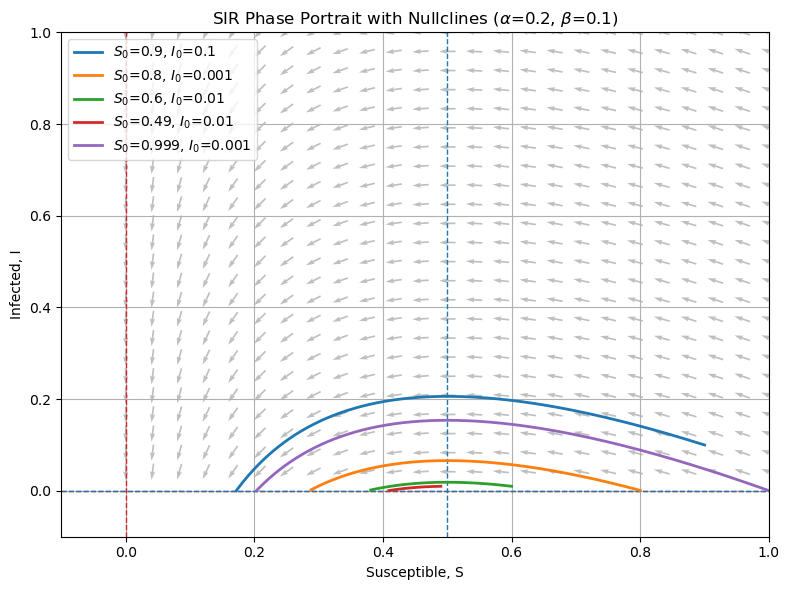

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# --- Parameters 
alpha = 0.2
beta  = 0.1

# --- Time for trajectories
t = np.linspace(0, 200, 1000)

# --- Initial conditions
initial_conditions = [
    (0.9,   0.1),
    (0.8,   0.001),
    (0.6,   0.01),
    (0.49,  0.01),
    (0.999, 0.001)
]

# --- Vector field grid
Sg = np.linspace(0.0, 1.0, 25)
Ig = np.linspace(0.0, 1.0, 25)
S, I = np.meshgrid(Sg, Ig)

# --- Vector field
dS = -alpha * S * I
dI =  I * (alpha * S - beta)

# Normalize (avoid divide-by-zero at equilibria)
mag = np.sqrt(dS**2 + dI**2)
mag[mag == 0] = 1.0
dSn = dS / mag
dIn = dI / mag

# --- Make figure/axes BEFORE plotting
plt.close('all')  # optional reset if running repeatedly
fig, ax = plt.subplots(figsize=(8, 6))

# Plot vector field
ax.quiver(S, I, dSn, dIn, angles='xy', color='gray', alpha=0.5, pivot='mid')

# --- Nullclines ---
# S-nullcline (dS/dt = 0): S=0 or I=0
ax.axvline(0, ls='--', color='tab:red',  lw=1)  # S = 0
ax.axhline(0, ls='--', color='tab:red',  lw=1)  # I = 0

# I-nullcline (dI/dt = 0): I=0 or S=beta/alpha
ax.axhline(0, ls='--', color='tab:blue', lw=1)                      # I = 0
ax.axvline(beta/alpha, ls='--', color='tab:blue', lw=1)             # S = beta/alpha

# --- SIR RHS
def SIR(y, t):
    S, I = y
    return [-alpha*S*I, alpha*S*I - beta*I]

# --- Trajectories
for S0, I0 in initial_conditions:
    sol = odeint(SIR, (S0, I0), t)
    ax.plot(sol[:, 0], sol[:, 1], lw=2, label=f"$S_0$={S0}, $I_0$={I0}")

# --- Decorate
ax.set_xlim(-.1, 1) # zooming out slightly to see nullcline on axis
ax.set_ylim(-.1, 1) # zooming out slightly to see nullcline on axis
ax.set_xlabel("Susceptible, S")
ax.set_ylabel("Infected, I")
ax.set_title(rf"SIR Phase Portrait with Nullclines ($\alpha$={alpha}, $\beta$={beta})")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


### Task 3: Repeat for new $\beta$ value.
Repeat, but for parameters $\alpha$=.2 and $\beta$=1. ($\beta$ increased by an order of magnitude).  
Solution: copy and paste code above, but change $\beta$ value.

### Task 4: Solve for the Jacobian symbolically.

In [ ]:
!pip install sympy

In [24]:
import sympy as sp

# Define symbolic variables
S, I, alpha, beta = sp.symbols('S I alpha beta')

# Define the right-hand side of the system
dS_dt = - alpha * I * S
dI_dt = alpha * I * S - beta * I

# Define the vector of equations
f = sp.Matrix([dS_dt, dI_dt])

# Define the vector of state variables
y = sp.Matrix([S, I])

# Compute the Jacobian: df/dy
J = f.jacobian(y)

# Display the Jacobian matrix
sp.pprint(J)

⎡-I⋅α   -S⋅α  ⎤
⎢             ⎥
⎣I⋅α   S⋅α - β⎦


### Task 5: Find eigenvalues and classify equilibria.

In [27]:
from scipy.optimize import fsolve # for numerical calculation of equilibrium

# Step 1: Define symbolic system for Jacobian
S, I = sp.symbols('S I', real=True)
alpha, beta = .2, .1 

dS_dt = - alpha * I * S
dI_dt = alpha * I * S - beta * I
f = sp.Matrix([dS_dt, dI_dt])
vars = sp.Matrix([S, I])
J = f.jacobian(vars)

# Step 2: Define numerical RHS for root finding
def SIR_rhs(y):
    S, I = y
    dS = - alpha * I * S
    dI = alpha * I * S - beta * I
    return [dS, dI]

# Step 3: Use fsolve to find numerical equilibrium
# have to start with an initial guess
guess = [0.2, 0.1] # you will need to move this guess to find each of the equilibria
S_star, I_star = fsolve(SIR_rhs, guess)
print("Numerical equilibrium found at: S =", S_star, ", I =", I_star)

# Step 4: Evaluate Jacobian numerically at the equilibrium
J_numeric = J.subs({S: S_star, I: I_star}).evalf()
print("\nJacobian at equilibrium:")
sp.pprint(J_numeric)

# Step 5: Compute eigenvalues
eigvals = J_numeric.eigenvals()
print("\nEigenvalues:")
sp.pprint(eigvals)

Numerical equilibrium found at: S = 0.19999999999999998 , I = 0.0

Jacobian at equilibrium:
⎡0  -0.04⎤
⎢        ⎥
⎣0  -0.06⎦

Eigenvalues:
{-0.06: 1, 0: 1}


### Try another guess
(notice an eigenvalue is now positiive)

In [29]:
# Step 3: Use fsolve to find numerical equilibrium
# have to start with an initial guess
guess = [0.8, 0.1] # you will need to move this guess to find each of the equilibria
S_star, I_star = fsolve(SIR_rhs, guess)
print("Numerical equilibrium found at: S =", S_star, ", I =", I_star)

# Step 4: Evaluate Jacobian numerically at the equilibrium
J_numeric = J.subs({S: S_star, I: I_star}).evalf()
print("\nJacobian at equilibrium:")
sp.pprint(J_numeric)

# Step 5: Compute eigenvalues
eigvals = J_numeric.eigenvals()
print("\nEigenvalues:")
sp.pprint(eigvals)

Numerical equilibrium found at: S = 0.8000000000000003 , I = -3.6734198463196485e-40

Jacobian at equilibrium:
⎡7.3468396926393e-41         -0.16       ⎤
⎢                                        ⎥
⎣-7.3468396926393e-41  0.0600000000000001⎦

Eigenvalues:
{7.3468396926393e-41: 1, 0.0600000000000001: 1}


### Task 6: Draw a bifurcation diagram for the parameter $\beta$ and variable $I$.
First, it might be interesting to look at a couple of phase portraits for different values of $\beta$ to develop some intuition.  You can also solve for equilibria by hand.  When we do this, if $I=0$, $S$ can be anything (line of disease-free equilibria along the $S$-axis).  If $S=\frac{\beta}{\alpha}$, solving $\frac{dS}{dt}=0$ requires $I=0$.  This can also be seen as the intersection of the nullclines on the plot you created.
With this analysis, we expect the bifurcation diagram to be a little boring, since the equilibrium value of $I$ will always be zero.

In [ ]:
!pip install tqdm

100%|██████████████████████████████████████| 400/400 [00:00<00:00, 23856.69it/s]


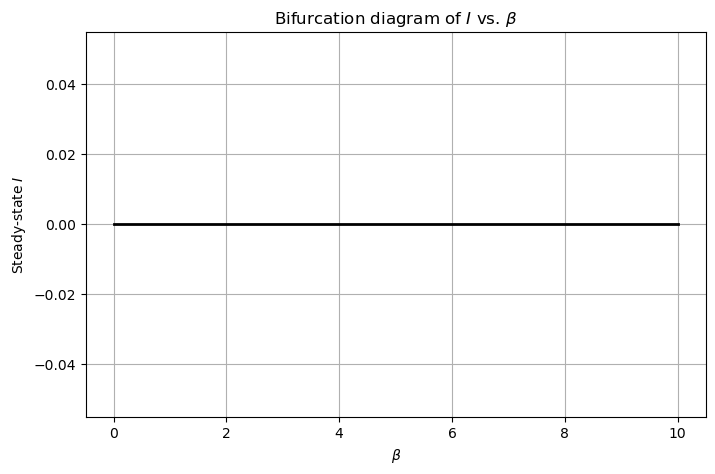

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
from tqdm import tqdm

# System: dy/dt = 0
def steady_state_equations(y, alpha, beta):
    S, I = y
    dS = - alpha * S * I
    dI = alpha * S * I - beta * I
    return [dS, dI]

# Parameters
alpha = 0.2   # fixed
beta_vals = np.linspace(0.01, 10, 400)  # fewer points is enough

I_steady = []
beta_record = []

# Loop over beta values
y_guess = (1.0, 0.01)   # a consistent initial guess near disease-free state
for beta in tqdm(beta_vals):
    sol = root(steady_state_equations, y_guess, args=(alpha, beta), method='hybr')
    if sol.success:
        y_ss = sol.x
        #I_steady.append(y_ss[1]) -- replace this to clean up round off error
        tol = 1e-8
        I_val = 0 if abs(y_ss[1]) < tol else y_ss[1] # pick out steady state I value
        #####
        I_steady.append(I_val)
        beta_record.append(beta)
        # use this solution as the next guess (continuation makes it smooth)
        y_guess = y_ss

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(beta_record, I_steady, 'k-', lw=2)
plt.xlabel(r'$\beta$')
plt.ylabel('Steady-state $I$')
plt.title(r'Bifurcation diagram of $I$ vs. $\beta$')
plt.grid(True)
plt.show()


### Task 7:  Export one figure and put it in an Overleaf document 
Several figures were saved above.  In Overleaf, you could upload your figure to the Figures folder in a project and then put in something like 

`\begin{figure}[h!]
    \centering
    \includegraphics[width=0.4\textwidth]{Figures/figure.jpg} 
    \caption{Phase Portait for SIR Model.}
    \label{fig:SIR_phase_portrait}
\end{figure}`

# More Exploration if Interested:
- Modify the SIR model to add vital dynamics with a birth/death rate $\mu$.  The equations will be 
$$\frac{dS}{dt}=\mu -\alpha S I - \mu S$$
$$ \frac{dI}{dt}=\alpha S I - \beta I - \mu I$$
Repeat the computational pipeline for figures (solutions, phase portrait, and a bifurcation diagram).  This bifurcation diagram might be more interesting. 

- Modify the model to include an exposed compartment $E$, representing latency in the disease (individuals aren't contagious yet, but will become infected).  (Let $\gamma$ be the parameter that relates to moving from compartment $E$ to compartment $I$.)  Plot solutions, and compare to infection curves for the SIR model.  Is there something that occurs qualitatively?

- Consider again the SIR model with vital dynamics (birth and death with rate $\mu$).  Modify the parameter $alpha$ for transmission.  You can choose a function of time to represent seasonal transmission, or a function of $I$ to represent behavioral modification (masking, social distancing) as infections numbers rise.

- Consider our model in class for the transmission of the parasite *Toxoplasma gondii* in a cat population.  Our model includes a susceptible compartment, an acutely infected compartment, a chronically infected compartment and a compartment for the parasite in the enviroment.  This comes from shedding of the two infected populations which happen at differen rates.  This is our model from class:
$$ \frac{dS}{dt}=b-\omega E S - \delta_S S $$
$$ \frac{dI}{dt}=\omega E S - \gamma I - \delta_I I $$
$$ \frac{dC}{dt}= \gamma I - \delta_C C $$
$$ \frac{dE}{dt}=\lambda_I I + \lambda_C C - \eta E $$
 To start here are some parameters that you can use:
$b=\frac{60}{52}$, $\omega = .046$, $\gamma=\frac{11}{15}$, $\delta_S=\frac{2}{520}$, $\delta_I = .00404$, $\delta_C = .003848$, $\eta = \frac{4}{52}$,  $\lambda_I=\frac{7}{1100}$, $\lambda_C=0$.  You can use initial conditions $S(0)=495$, $I(0)=5$, $C(0)=0$, $E(0)=0$.
Plot the solution.  What do you notice?
- Explore how $\omega$, the rate of infection, affects the steady state population sizes. Let $\omega$ vary between $0$ and $.15$.  You can explore this by graphing solutions for different values, graphing phase portraits for different values, or by creating a bifurcation diagram.

### First 2 Prompts
Modify the earlier code with the new equations and you will have it.

### Seasonal Transmission

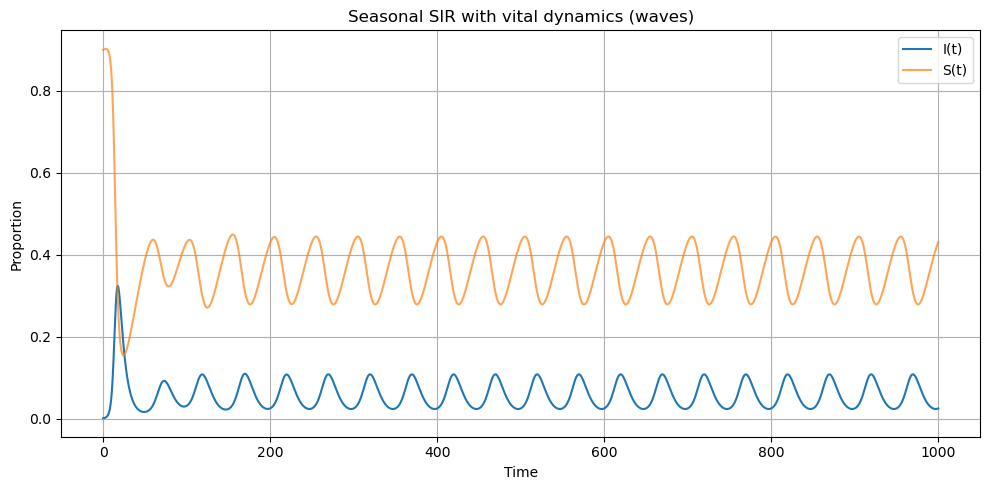

In [35]:

# Params (tweak these to taste)
alpha0 = 0.6     # baseline transmission
beta   = 0.2     # recovery
mu     = 0.02    # birth/death replenishes susceptibles
eps    = 0.3     # seasonal forcing amplitude (0..1)
T      = 50.0    # period of forcing

def alpha_t(t):
    return alpha0 * (1 + eps * np.sin(2*np.pi*t/T))

def SIR_seasonal_vital(y, t):
    S, I = y
    a = alpha_t(t)
    dS = mu - a*S*I - mu*S
    dI = a*S*I - beta*I - mu*I
    return [dS, dI]

y0 = (0.9, 0.001)             # tiny seed
t  = np.linspace(0, 1000, 5000)  # long horizon to see multiple waves

sol = odeint(SIR_seasonal_vital, y0, t)
S, I = sol[:,0], sol[:,1]
R = 1 - S - I                  # if you want to show it

plt.figure(figsize=(10,5))
plt.plot(t, I, label="I(t)")
plt.plot(t, S, label="S(t)", alpha=0.7)
plt.xlabel("Time"); plt.ylabel("Proportion")
plt.title("Seasonal SIR with vital dynamics (waves)")
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()


### Cat Model


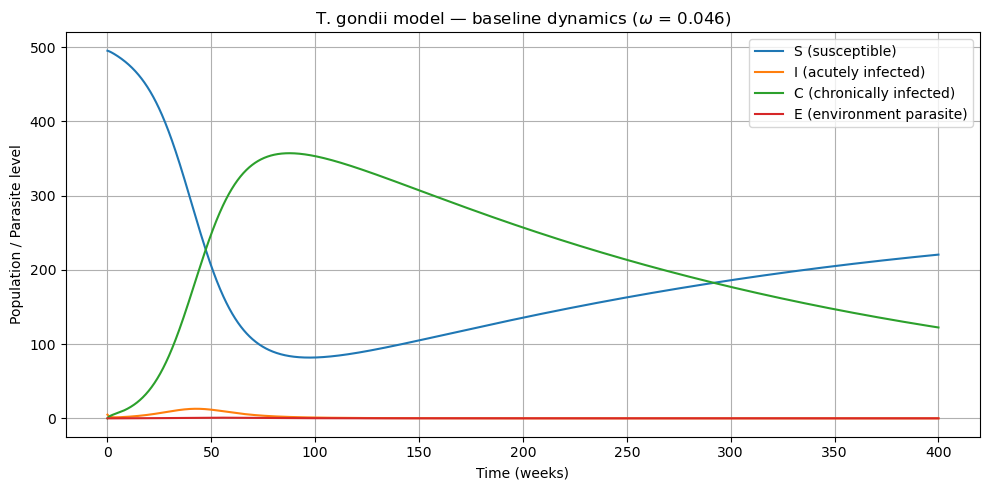

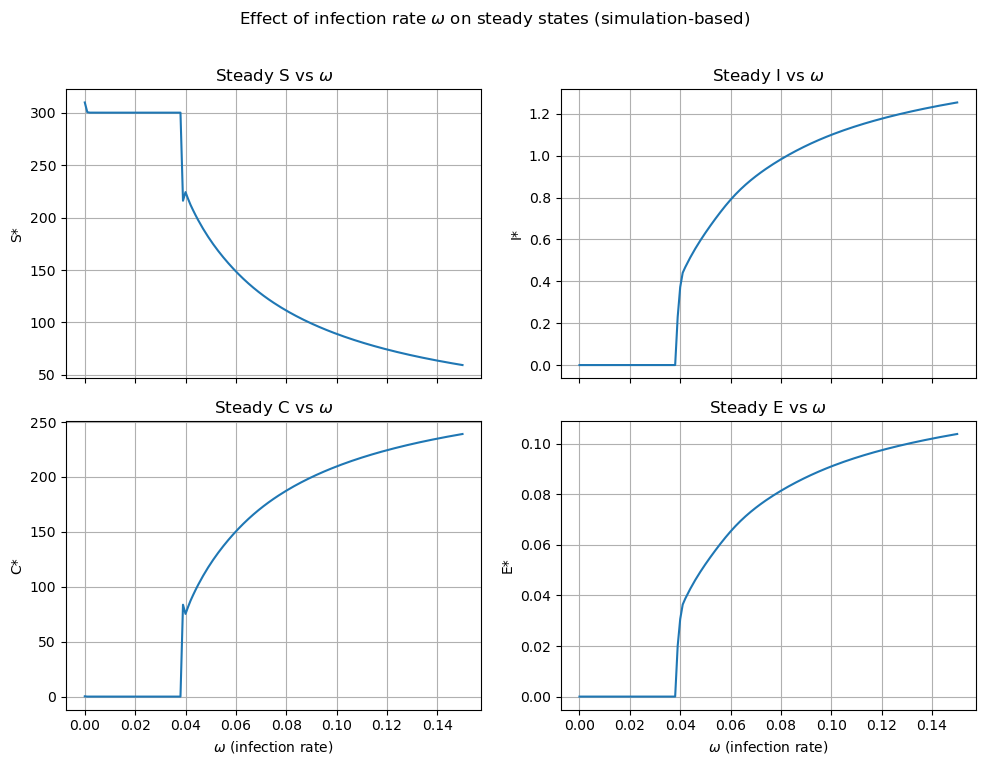

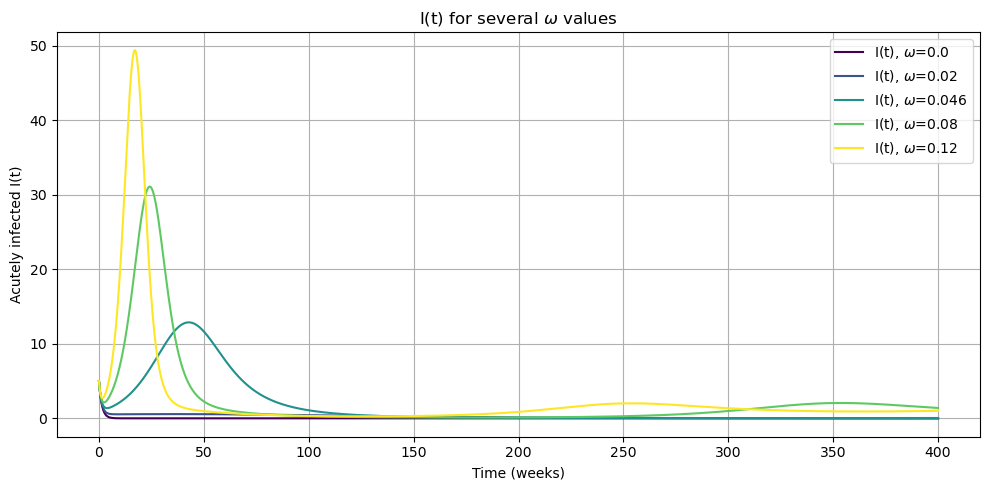

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# -----------------------------
# Parameters (per week)
# -----------------------------
b       = 60/52          # births
omega0  = 0.046          # baseline infection rate (will vary later)
gamma   = 11/15          # rate I -> C
delta_S = 2/520          # susceptible death
delta_I = 0.00404        # infected death (given)
delta_C = 0.003848       # chronic death (given ~ 2/520 * 1.0005)
eta     = 4/52           # parasite decay from environment
lambda_I= 7/1100         # shedding from I
lambda_C= 0.0            # shedding from C (set to 0 here)

# -----------------------------
# Model RHS: y = (S, I, C, E)
# -----------------------------
def toxo_model(y, t, omega):
    S, I, C, E = y
    dS = b - omega*E*S - delta_S*S
    dI = omega*E*S - gamma*I - delta_I*I
    dC = gamma*I - delta_C*C
    dE = lambda_I*I + lambda_C*C - eta*E
    return [dS, dI, dC, dE]

# -----------------------------
# Initial conditions and time
# -----------------------------
y0 = (495.0, 5.0, 0.0, 0.0)            # S(0), I(0), C(0), E(0)
t  = np.linspace(0, 400, 2000)         # weeks; long enough to see settling

# -----------------------------
# 1) Baseline simulation (omega = 0.046)
# -----------------------------
sol = odeint(toxo_model, y0, t, args=(omega0,))
S, I, C, E = sol.T

plt.figure(figsize=(10,5))
plt.plot(t, S, label="S (susceptible)")
plt.plot(t, I, label="I (acutely infected)")
plt.plot(t, C, label="C (chronically infected)")
plt.plot(t, E, label="E (environment parasite)")
plt.xlabel("Time (weeks)")
plt.ylabel("Population / Parasite level")
plt.title("T. gondii model — baseline dynamics ($\omega$ = 0.046)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# -----------------------------
# 2) Explore how omega affects steady states
#    Simple, student-friendly approach:
#    - For each omega, integrate to a long time
#    - Take the average over the last part of the simulation as the "steady" value
#    - Use continuation: start each run from the previous run's final state
# -----------------------------
omegas = np.linspace(0.0, 0.15, 151)    # vary omega from 0 to 0.15
t_long = np.linspace(0, 800, 4000)      # longer horizon for steady state
last_window = 200                       # average over the last 200 time points

S_star, I_star, C_star, E_star = [], [], [], []

y_guess = y0  # start each run from the previous final state 

for w in omegas:
    sol_w = odeint(toxo_model, y_guess, t_long, args=(w,))
    S_w, I_w, C_w, E_w = sol_w.T # odeint returns array with column for each variable, 
    #transpose this to unpack each variable's full time series in one line
    # update guess for next w
    y_guess = sol_w[-1, :] # last time step
    # "steady state" = average near the end (smooths tiny oscillations/noise)
    S_star.append( S_w[-last_window:].mean() )
    I_star.append( I_w[-last_window:].mean() )
    C_star.append( C_w[-last_window:].mean() )
    E_star.append( E_w[-last_window:].mean() )

S_star = np.array(S_star)
I_star = np.array(I_star)
C_star = np.array(C_star)
E_star = np.array(E_star)

# Plot “bifurcation-style” curves of steady values vs omega
fig, ax = plt.subplots(2, 2, figsize=(10,8), sharex=True)
ax = ax.ravel()

ax[0].plot(omegas, S_star, '-')
ax[0].set_title("Steady S vs $\omega$"); ax[0].set_ylabel("S*"); ax[0].grid(True)

ax[1].plot(omegas, I_star, '-')
ax[1].set_title("Steady I vs $\omega$"); ax[1].set_ylabel("I*"); ax[1].grid(True)

ax[2].plot(omegas, C_star, '-')
ax[2].set_title("Steady C vs $\omega$"); ax[2].set_xlabel("$\omega$ (infection rate)"); ax[2].set_ylabel("C*"); ax[2].grid(True)

ax[3].plot(omegas, E_star, '-')
ax[3].set_title("Steady E vs $\omega$"); ax[3].set_xlabel("$\omega$ (infection rate)"); ax[3].set_ylabel("E*"); ax[3].grid(True)

plt.suptitle("Effect of infection rate $\omega$ on steady states (simulation-based)")
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

# -----------------------------
# 3) (Optional) A few time series for different omega, to compare “shapes”
# -----------------------------
omegas_demo = [0.0, 0.02, 0.046, 0.08, 0.12]
colors = plt.cm.viridis(np.linspace(0,1,len(omegas_demo)))

plt.figure(figsize=(10,5))
for col, w in zip(colors, omegas_demo):
    sol_w = odeint(toxo_model, y0, t, args=(w,))
    plt.plot(t, sol_w[:,1], color=col, label=f"I(t), $\omega$={w}")
plt.xlabel("Time (weeks)")
plt.ylabel("Acutely infected I(t)")
plt.title("I(t) for several $\omega$ values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
